# Invisible Work: Quantifying Midfield Impact Runs

### Summary

This notebook contains the official submission for the project **Invisible Work: Quantifying Midfield Impact Runs**. It brings together the key analyses selected to support the main project. Every analysis and visualization included in this file has been designed with a clear purpose, supported by football-specific reasoning and chosen to highlight the most relevant insights.

The goal of this project is to develop a practical and interpretable framework to quantify midfielders’ off-ball movement and evaluate its impact on team performance. By focusing on movement without the ball, the project aims to capture an important but often overlooked aspect of the game, providing tools to better understand how players create value beyond traditional on-ball actions.

The analyses presented in this notebook are intended to be useful across multiple contexts, including scouting, tactical evaluation, and opponent analysis. They allow users to identify midfielders who use their movement efficiently, contribute to ball circulation and progression, and add value to attacking sequences even when not directly involved in the final action.

In addition to established concepts, the project introduces two novel metrics specifically focused on midfield play: **defensive density change** and **space created**. These metrics are designed to quantify how off-ball runs influence defensive structures and open opportunities for teammates. Moreover, the project uses radar visualizations to provide an aggregated view of run quality across selected metrics, enabling intuitive player profiling. Run types are grouped following SkillCorner’s recent analytical framework, allowing for a clearer and more consistent interpretation of different movement patterns.

The notebook concludes with a set of observations and results extracted from the analysis. Finally, it outlines future work and improvements to further develop the analysis and its practical applications.

#### *Environment setup*

To reproduce this analysis, create the conda environment using the provided
`environment.yml` file and activate it:

```bash
conda env create -f environment.yml
conda activate hackathon_env

In [1]:
import os

from src.data_loading.load_data import load_matches
from src.analysis.exploratory import a_obr_per_subtype, a_obr_per_subtype_per_phase
from src.analysis.radar_plots import a_obr_per_subtype_per_team, a_obr_per_subtype_per_player
from src.analysis.def_density_change import a_ddc_distance_player
from src.analysis.space_created import a_space_created
from src.analysis.xthreat import a_xthreat_per_run_group
from src.obr_new_profiles import a_obr_new_profiles

In [ ]:
data_path = os.path.join(os.getcwd(), "src/data")
all_tracking, dynamic_events_all, all_metadata = load_matches(data_path)

### Main project
#### Introduction

Football analysis has traditionally focused on on-ball events such as passes, shots, and carries. However, during a football match, a large number of actions without the ball take place that influence players’ decisions, team dynamics, and ultimately the outcome of the game. One crucial component of this off-ball behaviour is **players off-ball runs**.

Off-ball runs serve multiple tactical purposes: they create space, help players get free from opponents, disrupt defensive structures, provide passing options for the player in possession,... Although these actions are often not directly rewarded with the ball, they can have a significant impact on how attacking sequences develop.

As shown in Figure 1, players perform more than **456** off-ball runs per 90 minutes on average, with approximately **64%** of these runs remaining untargeted. This highlights that the majority of player movement occurs without direct ball involvement, yet still represents a substantial part of the game that should not be overlooked.

This project focuses on the analysis of off-ball runs performed by midfielders. Rather than only quantifying the volume of runs, it aims to evaluate their quality, assessing how different types of movement contribute to team performance and attacking potential.

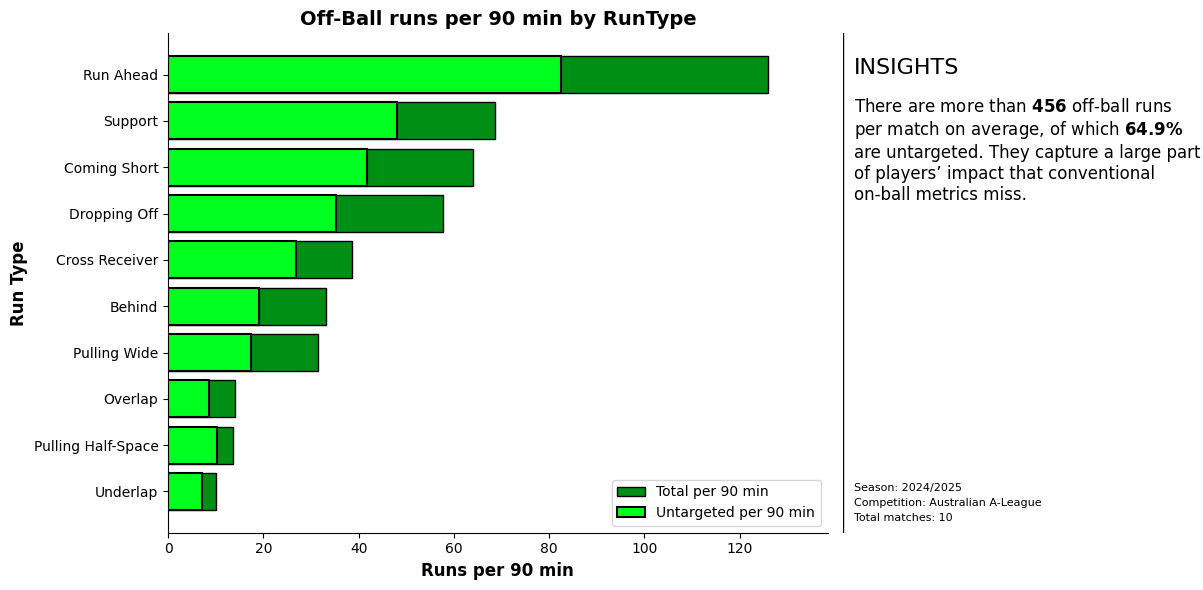

In [3]:
a_obr_per_subtype(all_tracking,dynamic_events_all)

Off-ball runs are not performed randomly, but are strongly influenced by the phase of play. Clear differences emerge between phases, indicating that certain movement patterns are more common in structured build-up situations, while others occur more frequently during transition or chaotic phases. This phase dependency suggests that off-ball runs are executed with **specific tactical intentions**, adapting to the available space and demands of each moment in the game.

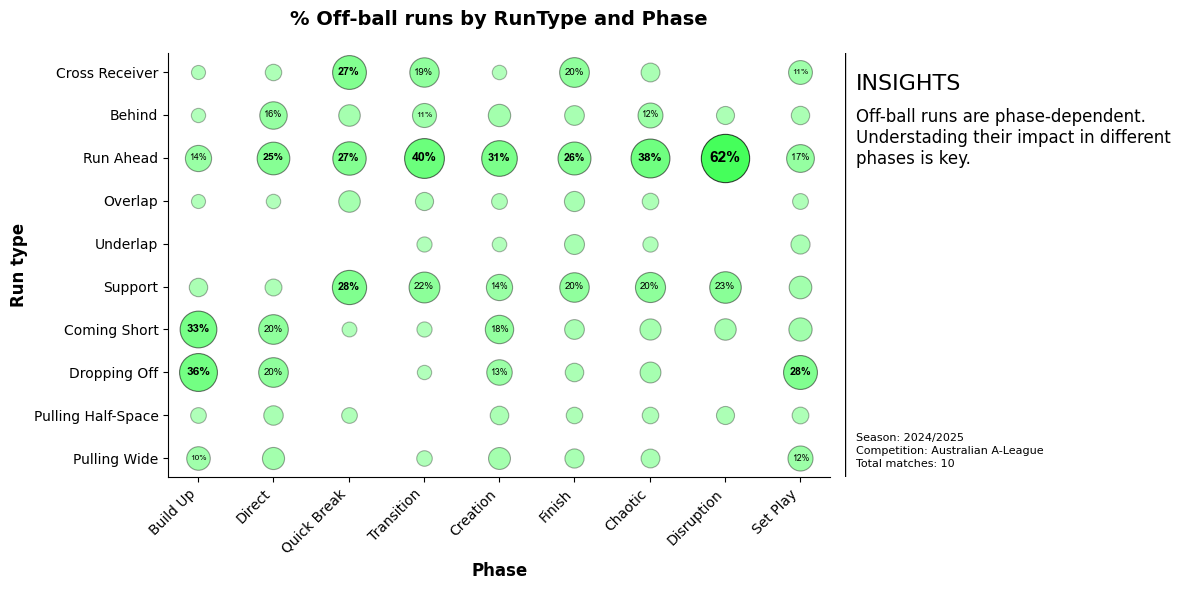

In [4]:
a_obr_per_subtype_per_phase(dynamic_events_all)

By comparing teams and players based on the distribution of off-ball runs across different run types, it is possible to identify distinct movement profiles and playing styles. These comparisons highlight differences in how teams and players use off-ball movement, making them useful for tactical analysis and player evaluation.

However, the number of runs alone is not sufficient to fully describe off-ball contribution. A high run volume does not necessarily imply that these movements are effective or add value to the team. To properly assess off-ball performance, it is therefore necessary to move beyond quantity and evaluate the **quality** of runs and their impact on the game.

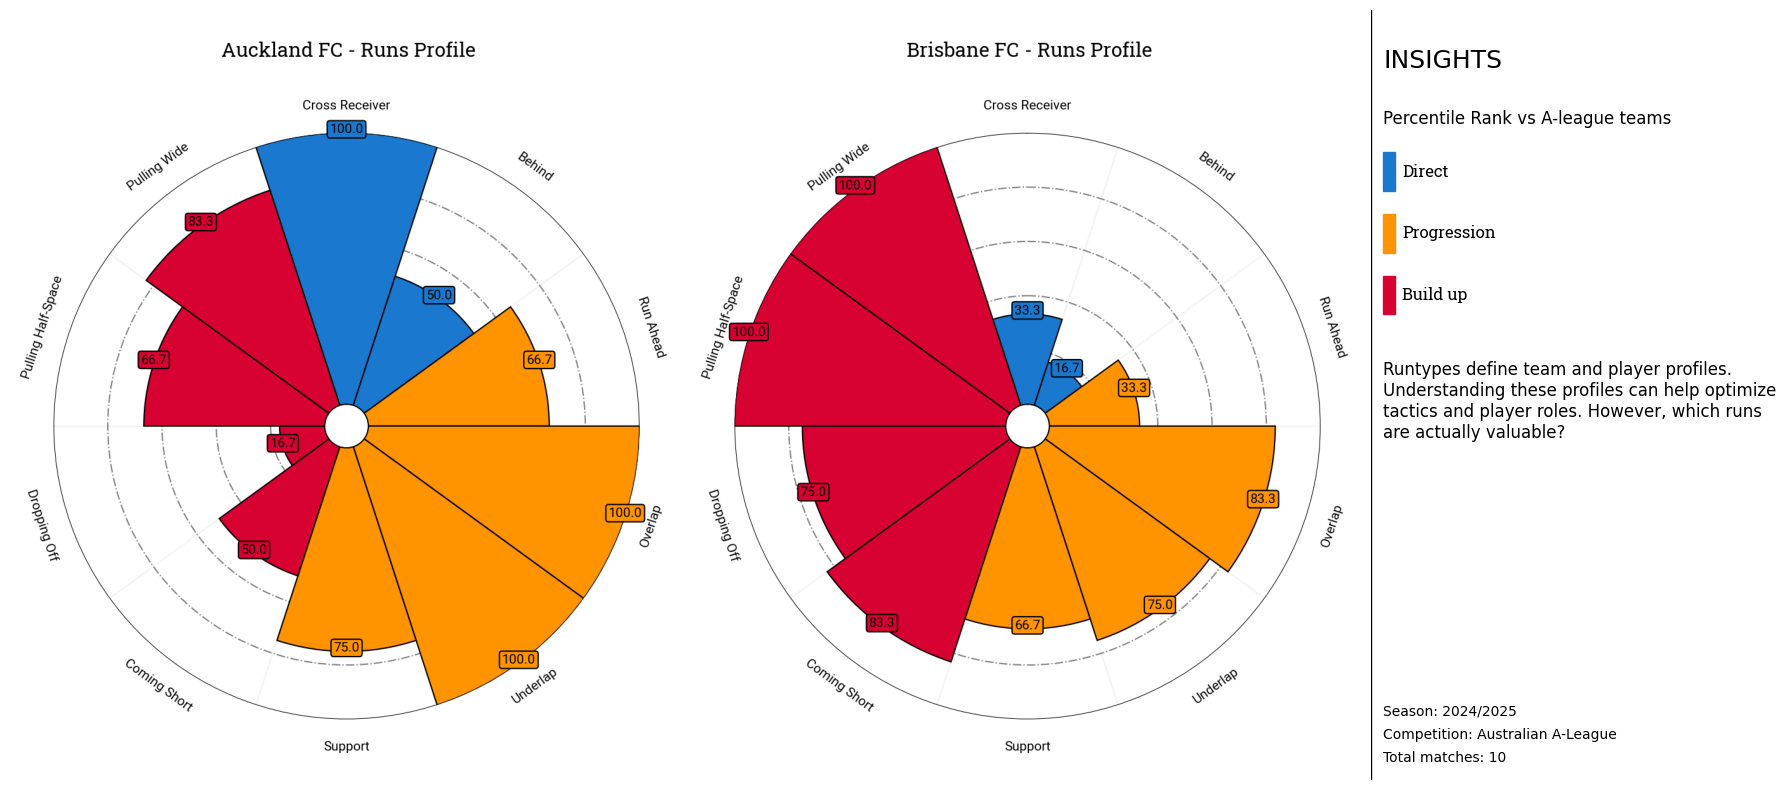

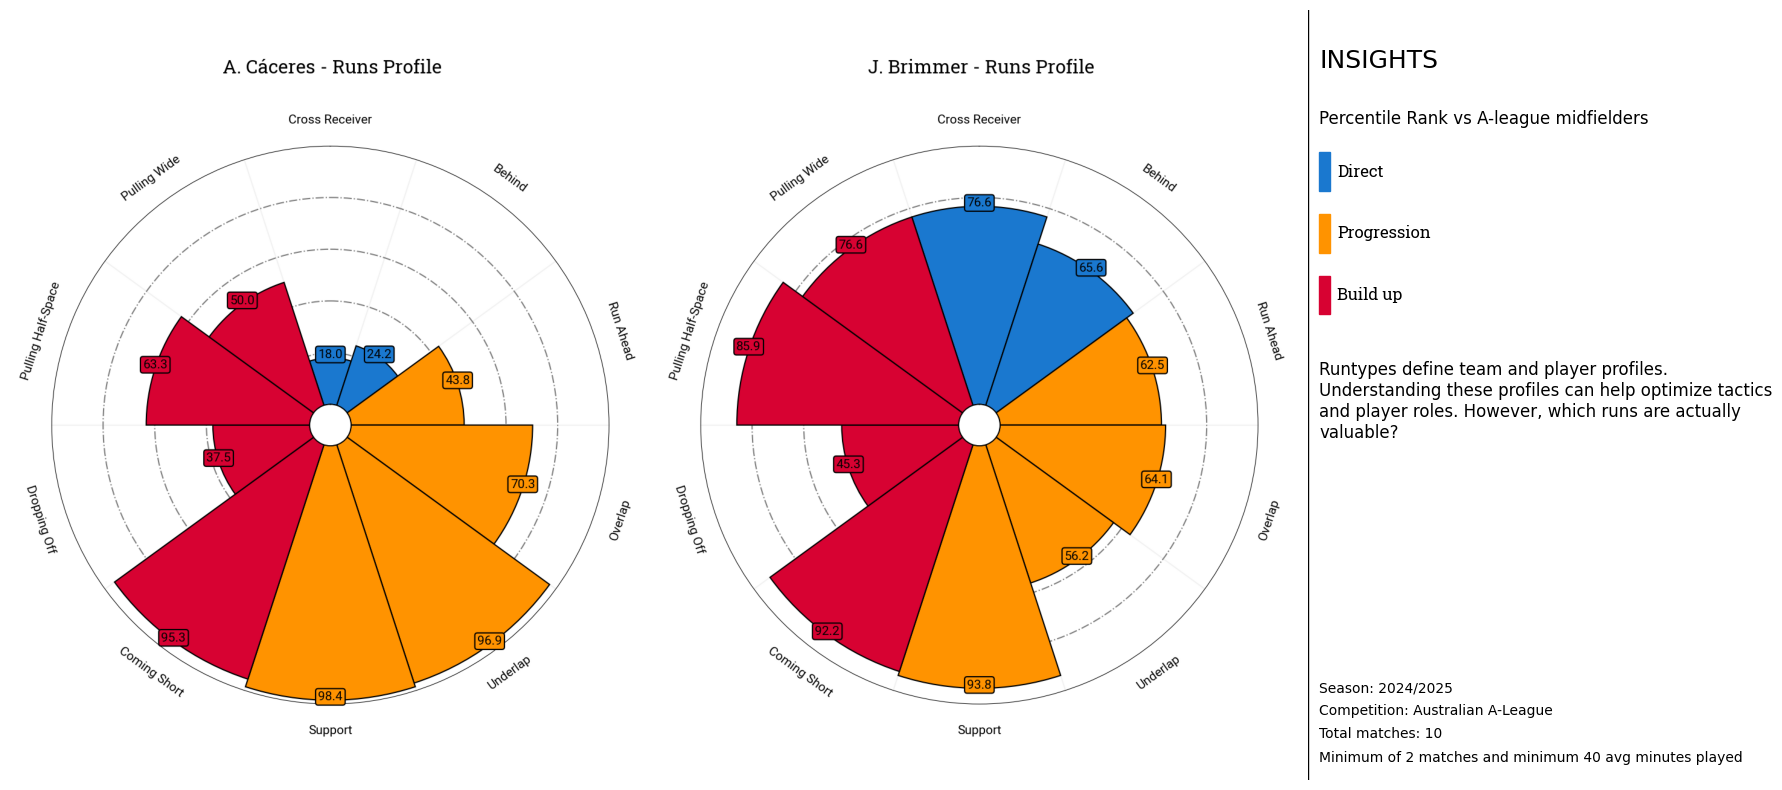

In [8]:
a_obr_per_subtype_per_team(all_tracking, dynamic_events_all, teams_shortnames=["Auckland FC", "Brisbane FC"])
a_obr_per_subtype_per_player(all_metadata, dynamic_events_all, players_names = ["A. Cáceres", "J. Brimmer"], min_matches=2, min_avg_minutes_played=40)

**Midfielders** rank second in how evenly their off‑ball runs are spread across different run types while still accounting for a substantial share of all runs. Combined with the available physical aggregation data for this position group, this makes midfielders a choice for an analysis of their off‑ball movement.

#### Defensive density change
Off-ball runs are primarily executed to get free and receive the ball in advantageous positions. These movements are crucial for maintaining ball circulation, progressing play, and creating scoring opportunities. The **defensive density change** metric builds on this principle, evaluating not just the frequency of runs but the value they add in terms of space creation for themselves and attacking potential.

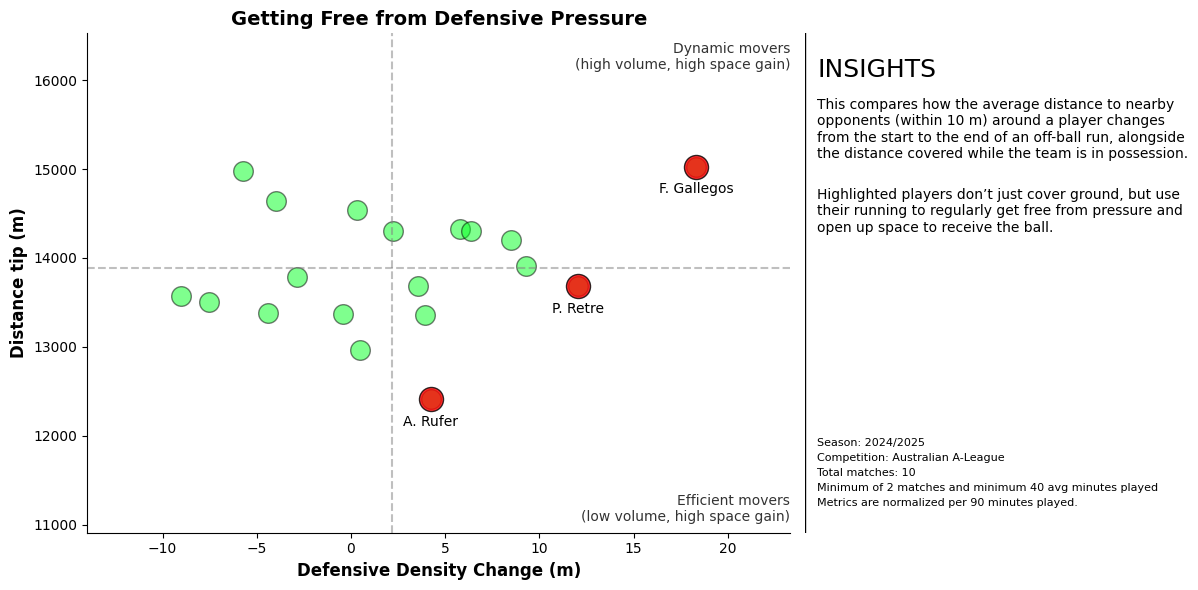

In [5]:
a_ddc_distance_player(dynamic_events_all, all_tracking, all_metadata, data_path, min_matches=2, min_avg_minutes_played=40)

#### Space created
Previously, it was discussed how off-ball runs help a player get free to receive the ball in advantageous positions. Now the **space created** metric extends this idea by measuring the space a player generates for teammates through their movement. It compares the player’s Voronoi area at the location of the start of the run with the average area in a short window around the end of the run (±5 frames) in that same location. This captures how the player’s movement opens opportunities for others, also facilitating ball circulation, advancing play, and adding value to the attack.

The space created metric is applied only to build-up runs because it measures how much extra room is left in the original lane after the runner moves. For direct and progression runs, the important space is where the runner arrives rather than what they leave behind, so this definition would be misleading for those run types.

In [3]:
a_space_created(dynamic_events_all, all_metadata, all_tracking, "1_91", min_matches=2, min_avg_minutes_played=40,csv_path=r"src\data\precomputed\space_creation_events.csv")

![Animation](src/data/figures/off_ball_run_animation.gif)

The **xThreatper90min** metric captures the impact of off-ball runs on attacking potential. While previous metrics measure movement or space creation, xThreat shows how these actions translate into dangerous situations. The focus is on direct and progression runs because these types of movement have the most immediate impact on advancing the ball and creating scoring opportunities.

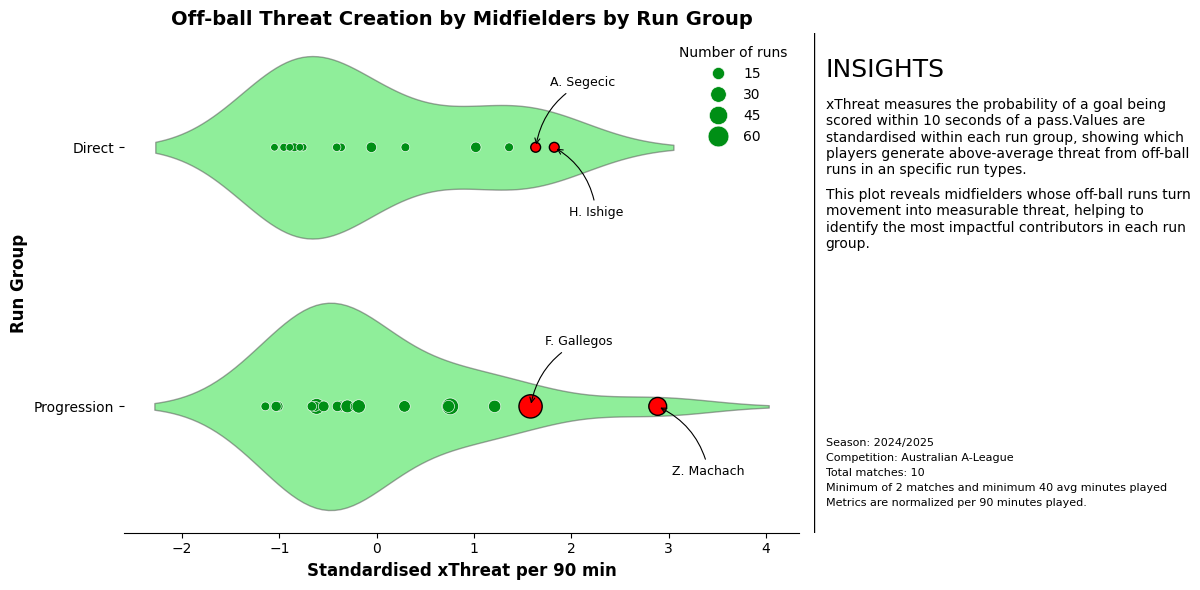

In [6]:
a_xthreat_per_run_group(dynamic_events_all, all_metadata, min_matches=2, min_avg_minutes_played=40)

#### Overall analysis
Building on the earlier player profiling based on run quantity, this analysis uses the newly created metrics to evaluate the quality of off-ball runs. By combining these measures, it is possible to generate a comprehensive view of a player’s effectiveness. This approach highlights not just how often a player moves, but how valuable their movements are for the team, providing insights for scouting, tactical analysis, and performance evaluation.

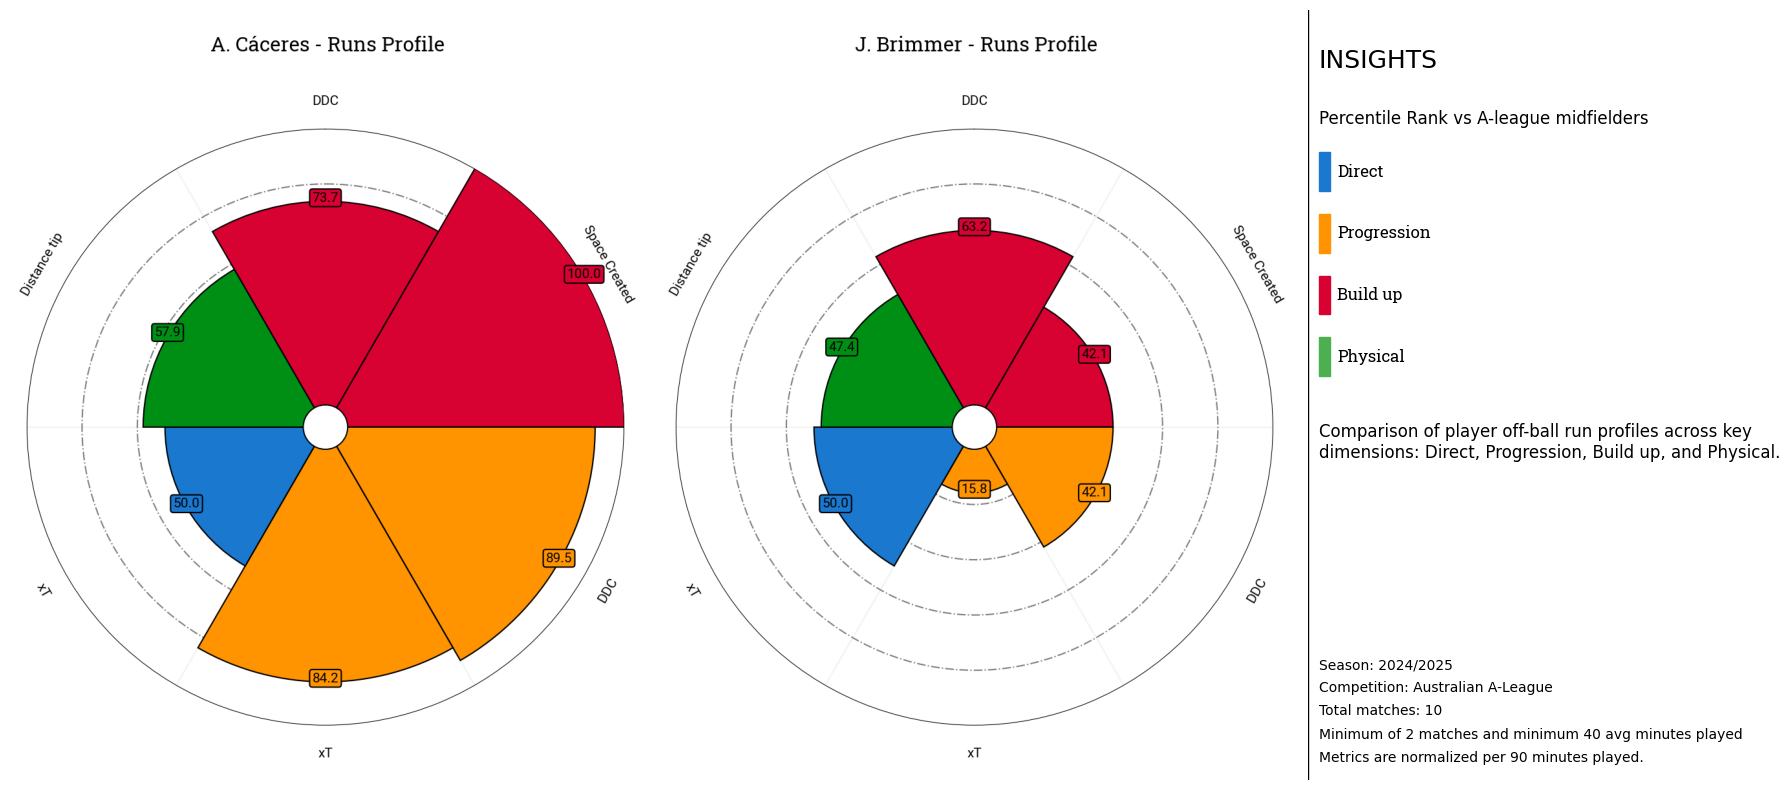

In [6]:
a_obr_new_profiles(dynamic_events_all, all_metadata, all_tracking, data_path, min_matches=2, min_avg_minutes_played=40, players_names=["A. Cáceres", "J. Brimmer"], csv_path=r"src\data\precomputed\overall_profile_df.csv")

### Observations

The figures below compare the profiles of **F. Gallegos** and **N. Atkinson** using both types of radar plots.

From the run-volume perspective, both players appear highly dynamic, performing a large number of off-ball runs across all three run types. At this level, their movement profiles seem very similar. However, once the quality of these runs is evaluated using the proposed metrics, clear differences emerge.

F. Gallegos stands out well above the average midfielder in terms of both space created and defensive density change, indicating that his movements consistently generate meaningful advantages for his team. In contrast, although N. Atkinson also performs a high number of runs, he ranks well below average in these same metrics. This suggests that his movements, while frequent, are less effective in opening space or disrupting the opposition’s defensive structure.

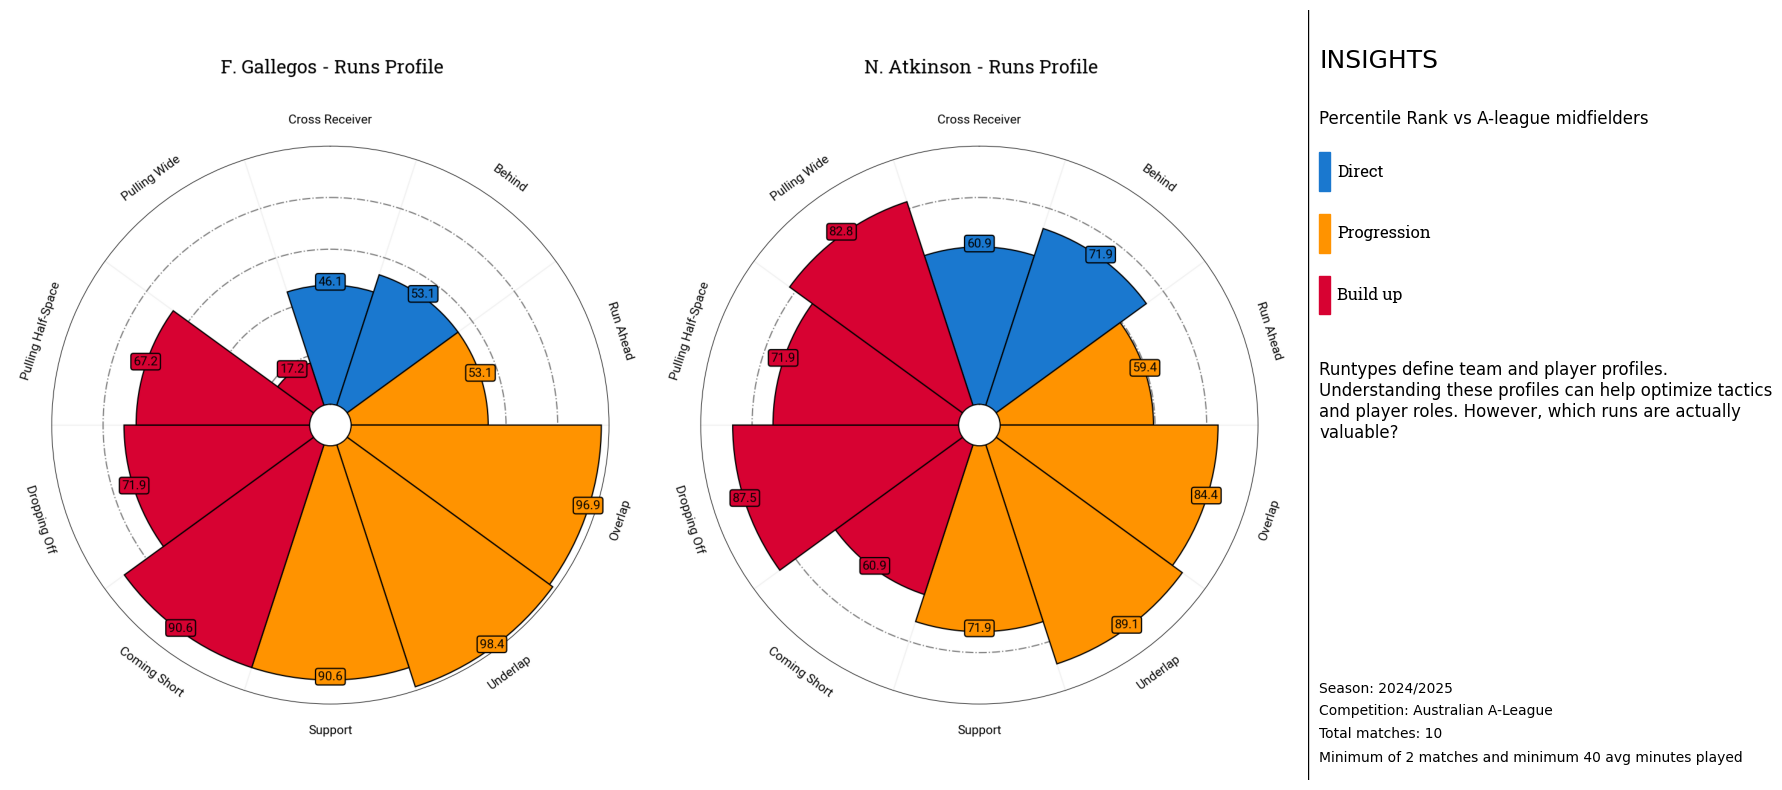

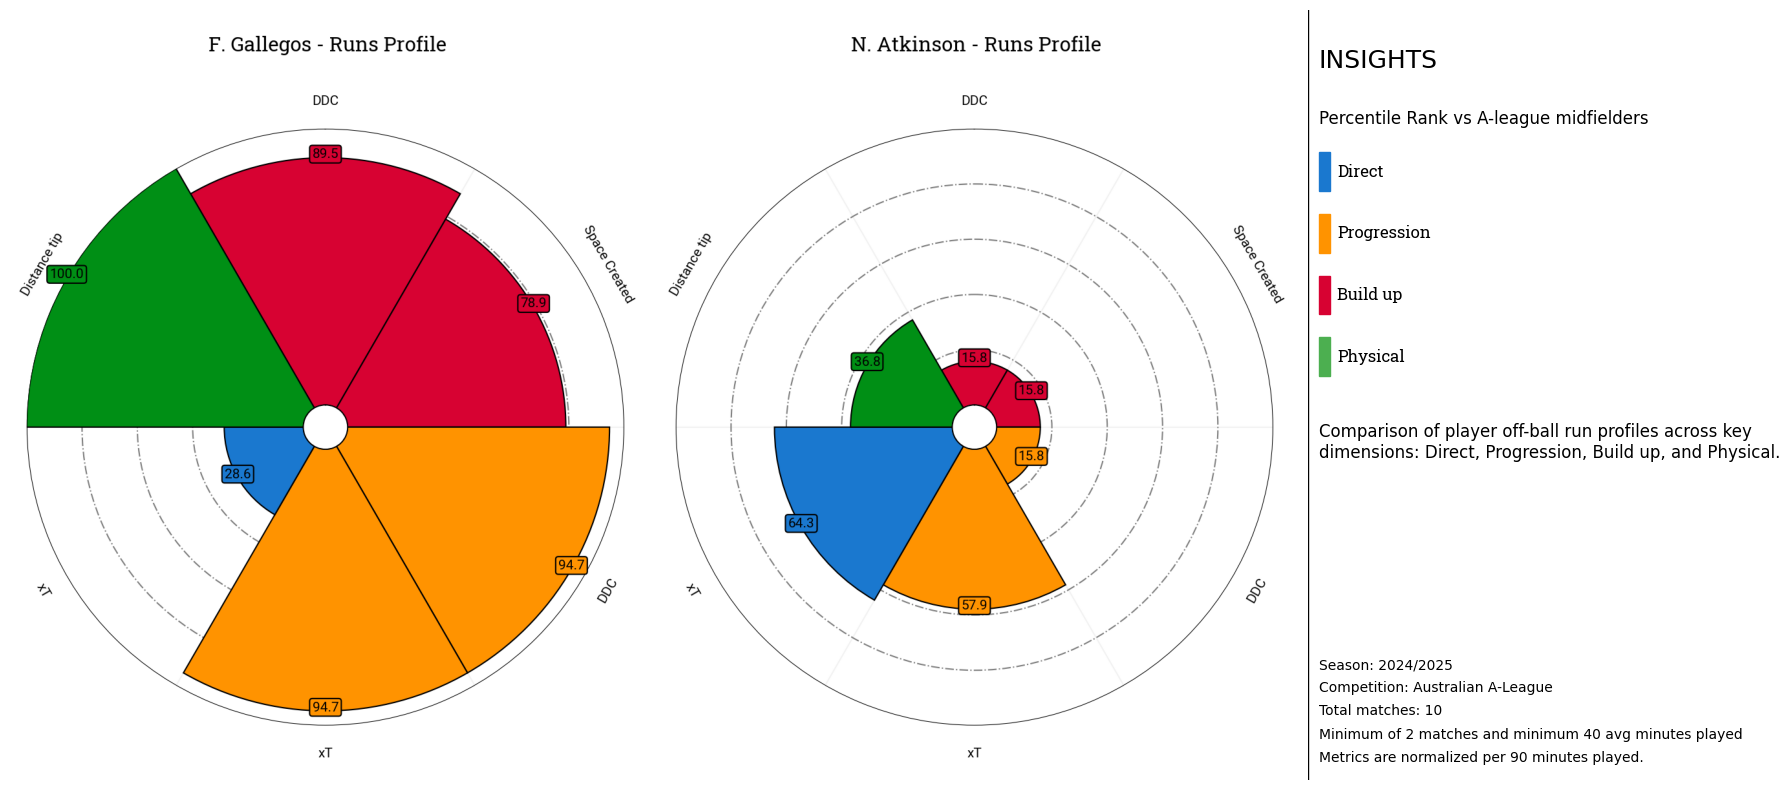

In [5]:
a_obr_per_subtype_per_player(all_metadata, dynamic_events_all, players_names = ["F. Gallegos", "N. Atkinson"], min_matches=2, min_avg_minutes_played=40)
a_obr_new_profiles(dynamic_events_all, all_metadata, all_tracking, data_path, min_matches=2, min_avg_minutes_played=40, players_names=["F. Gallegos", "N. Atkinson"], csv_path=r"src\data\precomputed\overall_profile_df.csv")

Another example is shown below, comparing the profiles of **R. Teague** and **L. Verstraete**. R. Teague appears fairly average in terms of the total number of off-ball runs. However, despite covering relatively little distance, he ranks above average in both space created and defensive density change, highlighting his ability to generate value through efficient and well-timed movement rather than sheer volume or intensity.

In contrast, L. Verstraete also shows an average profile in total runs, but the second radar plot reveals a different picture in terms of run quality. He ranks low on the metrics while being one of the players who covers the most distance. This suggests a highly dynamic playing style that relies on constant movement, but one that does not consistently translate into space creation or defensive density change.

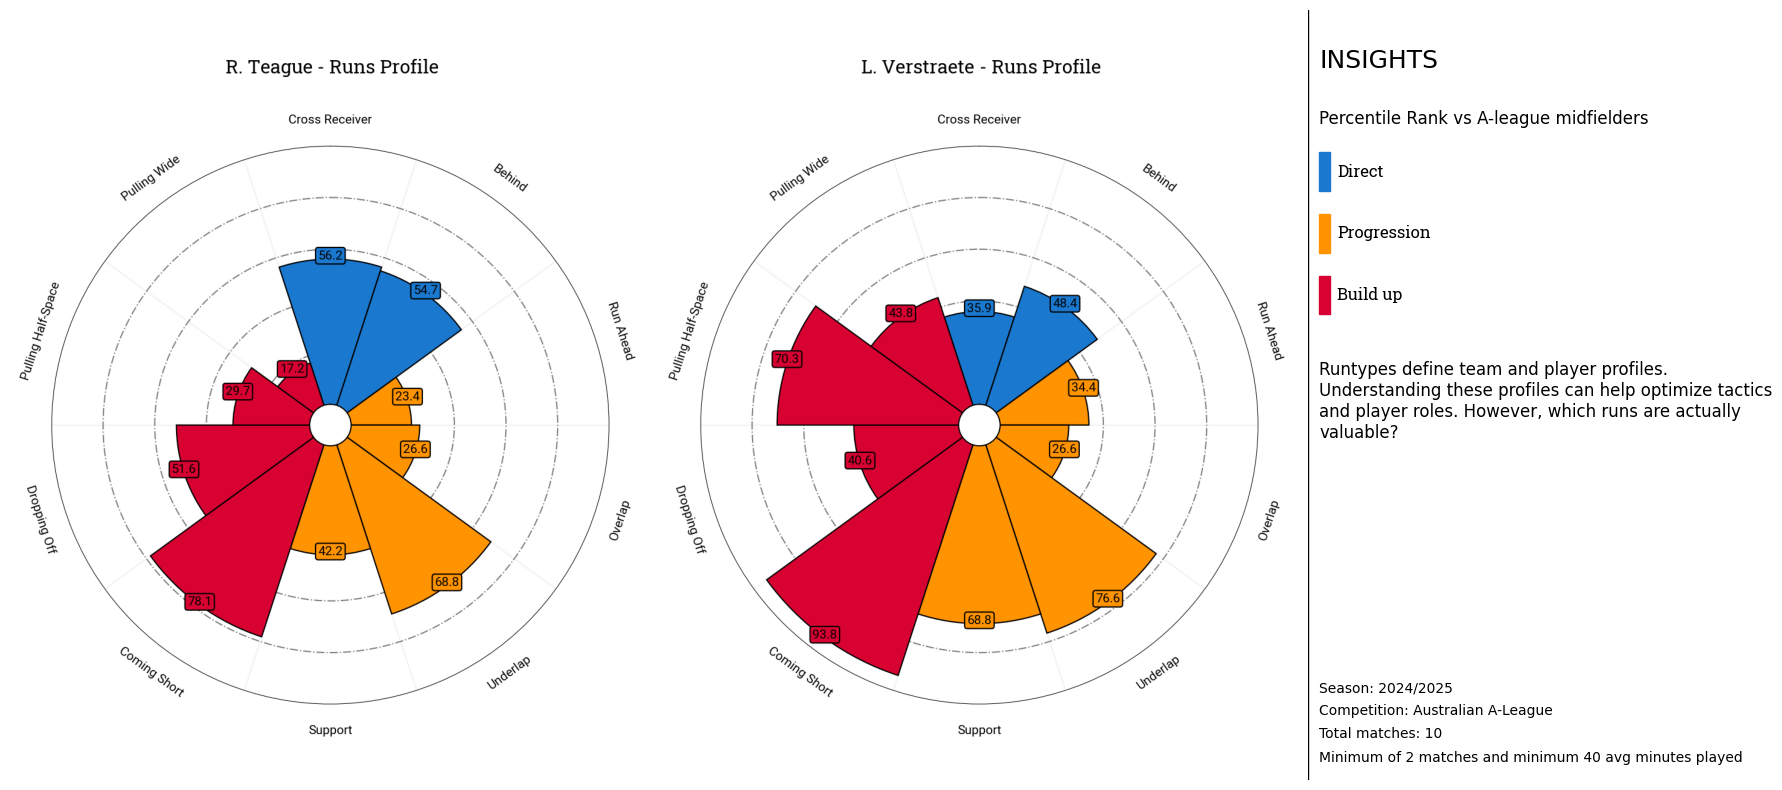

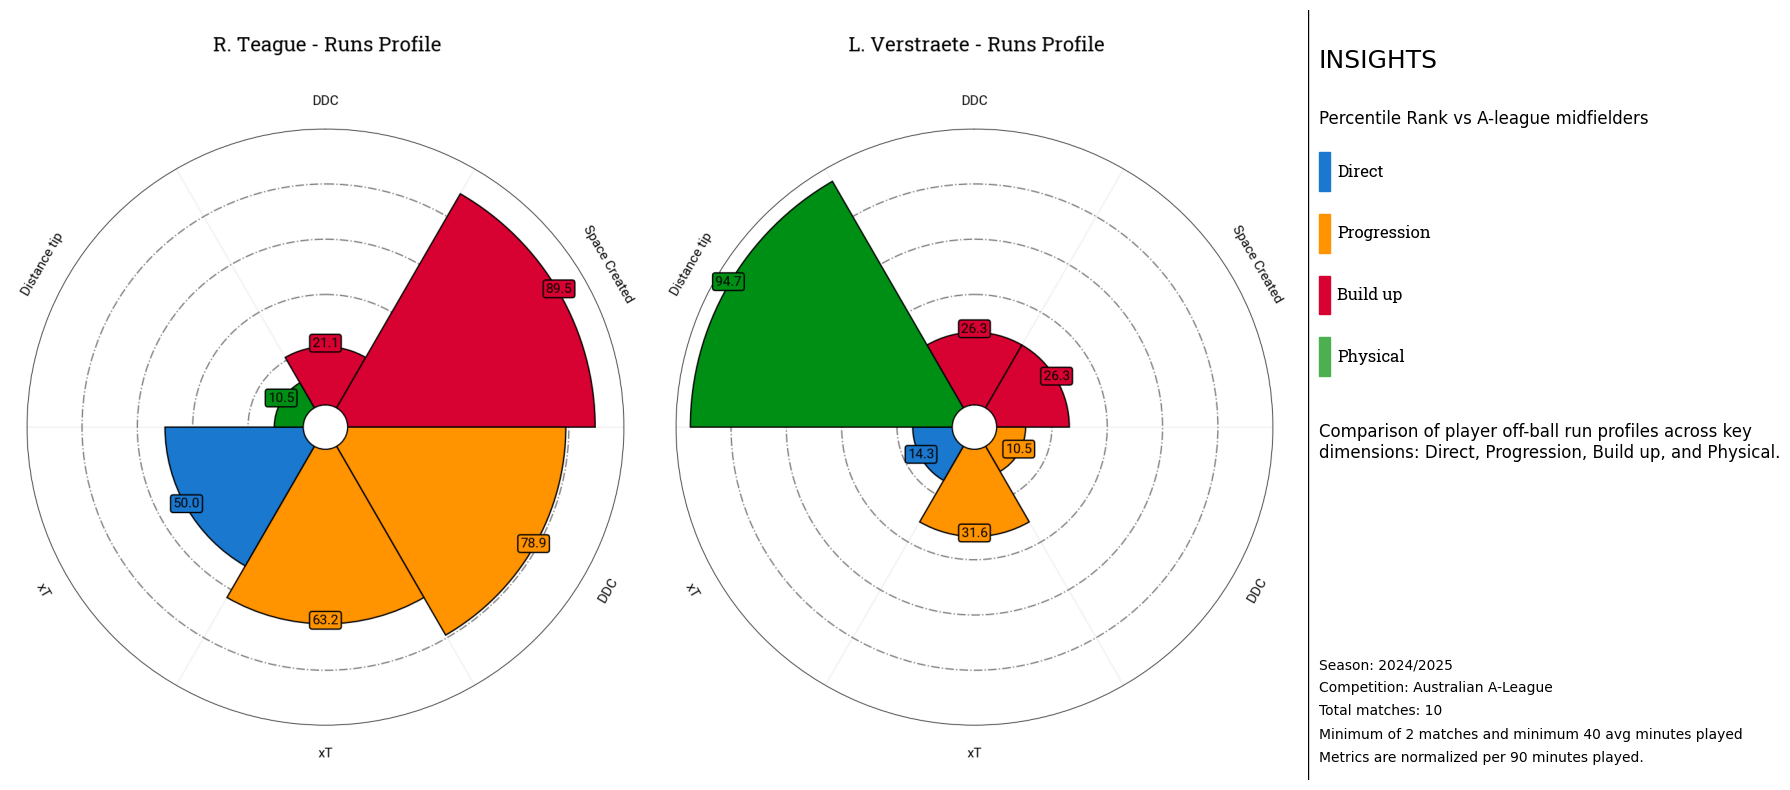

In [34]:
a_obr_per_subtype_per_player(all_metadata, dynamic_events_all, players_names = ["R. Teague", "L. Verstraete"], min_matches=2, min_avg_minutes_played=40)
a_obr_new_profiles(dynamic_events_all, all_metadata, all_tracking, data_path, min_matches=2, min_avg_minutes_played=40, players_names=["R. Teague", "L. Verstraete"], csv_path=r"src\data\precomputed\overall_profile_df.csv")

### Future improvements

First of all, the space created metric currently relies on Voronoi areas to estimate pitch control and quantify the space generated by a player’s movement. While effective, this approach could be made more accurate by incorporating additional factors such as player speed, movement direction, and positional uncertainty. One promising extension is the neighbor-based pitch ownership model introduced by [Mendes‑Neves et al., 2025](https://arxiv.org/pdf/2501.05870), which approximates Voronoi diagrams using a K‑Nearest Neighbors (KNN) approach while accounting for motion and uncertainty.

Another important extension would be to analyze whether the spaces created by a player are actually utilized by teammates in the following frames. Once it is established that a teammate moves into these created areas, the next step would be to evaluate the quality of those occupied spaces using a tracking‑based possession value model such as the Expected Possession Value (EPV) framework proposed by [Fernández et al. (2019)](https://www.lukebornn.com/papers/fernandez_sloan_2019.pdf). Linking the occupied spaces to such a dynamic model would allow us to quantify not only how much space is opened, but how valuable that space becomes for generating scoring opportunities.

Finally, another potential improvement is to develop a clustering model for midfielders based on the selected metrics, including defensive density change, space created, and xThreat contributions. Such a model could identify players with similar movement profiles, providing valuable insights for scouting, talent identification, or player comparison, and helping teams target players who replicate the characteristics of high-impact performers.

### Conclusions

This project shows that off-ball movement, especially from midfielders, can be measured and analyzed in a meaningful way. The metrics developed, such as defensive density change and space created, help to understand how players impact the game even when they don’t have the ball. As shown in this project, using these metrics alongside visualizations and player profiling makes it possible to spot players who consistently make smart, effective movements that add real value to their team.

On a personal note, working on this project and participating in the hackathon has been an incredible experience. It has shown me how exciting it is to work with football data and confirmed that this is truly my passion. I have learned a great deal, and I know this is only the beginning of exploring the many opportunities this industry offers.

### Author

**Gabriel Gausachs**  
SkillCorner × PySport Hackathon  
2025
